In [1]:
import numpy as np
import tensorflow as tf
import os
import json
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")
import keras
from keras import layers
import time
import gc
import matplotlib.pyplot as plt

2024-03-22 17:07:15.556030: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 17:07:15.556061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 17:07:15.556928: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 17:07:15.561821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 17:07:16.102881: W tensorflow/compiler/tf2

No GPU found


2024-03-22 17:07:16.813819: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-03-22 17:07:16.813841: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: Bia
2024-03-22 17:07:16.813846: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: Bia
2024-03-22 17:07:16.813923: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.161.7
2024-03-22 17:07:16.813941: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.161.7
2024-03-22 17:07:16.813946: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.161.7


# generate some data :

In [2]:
x = np.random.uniform(size=1000)
y = x

# time vs neurons
try networks with fixed layers (will go with 6) and increasing number of neurons per layer

In [23]:
neurons = [10*p for p in range(1,50)]

for neuron in neurons:
    nn_input = keras.Input(shape=(1,))
    
    for i in range(6):
        if i == 0:
            nn_dense = layers.Dense(neuron, activation='relu')(nn_input)
        else:
            nn_dense = layers.Dense(neuron, activation='relu')(nn_dense)
    
    nn_output = layers.Dense(1, activation='linear')(nn_dense)
    
    model = keras.Model(inputs=nn_input, outputs=nn_output)
    model.compile(loss='MAE', optimizer='Adam')
    
    history=model.fit(x,y,batch_size=1000, verbose=0, epochs=1)
    model.save(f'neurons/{neuron}_model.h5',save_format='h5')


In [3]:
neurons = [10*p for p in range(1,50)]

time_dict = {}
for neuron in neurons:
    tf.keras.backend.clear_session()
    model = tf.keras.models.load_model(f'neurons/{neuron}_model.h5')
    time_array = np.zeros(100)
    for i in range(100):
        tic = time.time()
        model(np.array([0.5]))
        toc = time.time()
        time_array[i] = toc-tic
    time_dict[neuron] = time_array.mean()
    del model
    gc.collect()

2024-03-22 11:55:23.986632: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17982 MB memory:  -> device: 0, name: NVIDIA RTX A4500, pci bus id: 0000:41:00.0, compute capability: 8.6
2024-03-22 11:55:24.331918: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


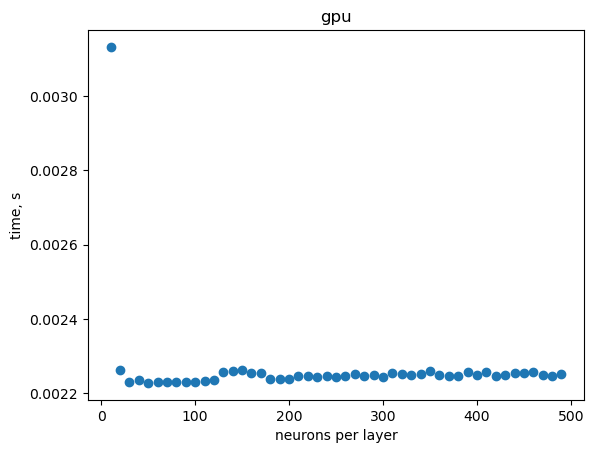

In [3]:
neurons = [10*p for p in range(1,50)]

time_dict = {}
for neuron in neurons:
    tf.keras.backend.clear_session()
    model = tf.keras.models.load_model(f'neurons/{neuron}_model.h5')
    time_array = np.zeros(100)
    for i in range(100):
        tic = time.time()
        model(np.array([0.5]))
        toc = time.time()
        time_array[i] = toc-tic
    time_dict[neuron] = time_array.mean()
    del model
    gc.collect()
    
plt.scatter(np.array(list(time_dict.keys())),list(time_dict.values()))
plt.ylabel('time, s')
plt.xlabel('neurons per layer')
plt.title('gpu')

with open("neurons/gpu_time_dict.json", "w") as outfile: 
    json.dump(time_dict, outfile)

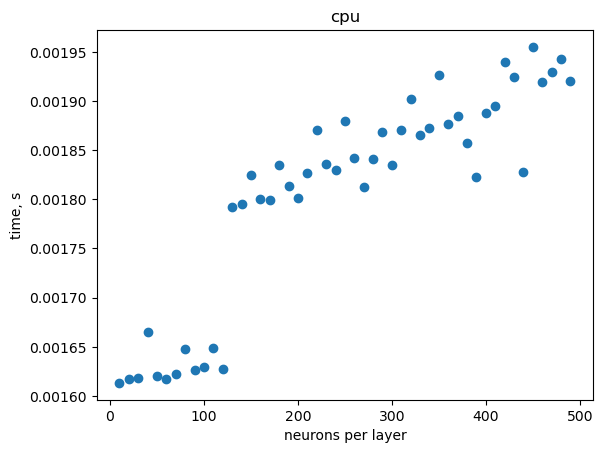

In [7]:
neurons = [10*p for p in range(1,50)]

time_dict = {}
for neuron in neurons:
    tf.keras.backend.clear_session()
    model = tf.keras.models.load_model(f'neurons/{neuron}_model.h5')
    time_array = np.zeros(100)
    for i in range(100):
        tic = time.time()
        model(np.array([0.5]))
        toc = time.time()
        time_array[i] = toc-tic
    time_dict[neuron] = time_array.mean()
    del model
    gc.collect()
    
plt.scatter(np.array(list(time_dict.keys())),list(time_dict.values()))
plt.ylabel('time, s')
plt.xlabel('neurons per layer')
plt.title('cpu')

with open("neurons/cpu_time_dict.json", "w") as outfile: 
    json.dump(time_dict, outfile)

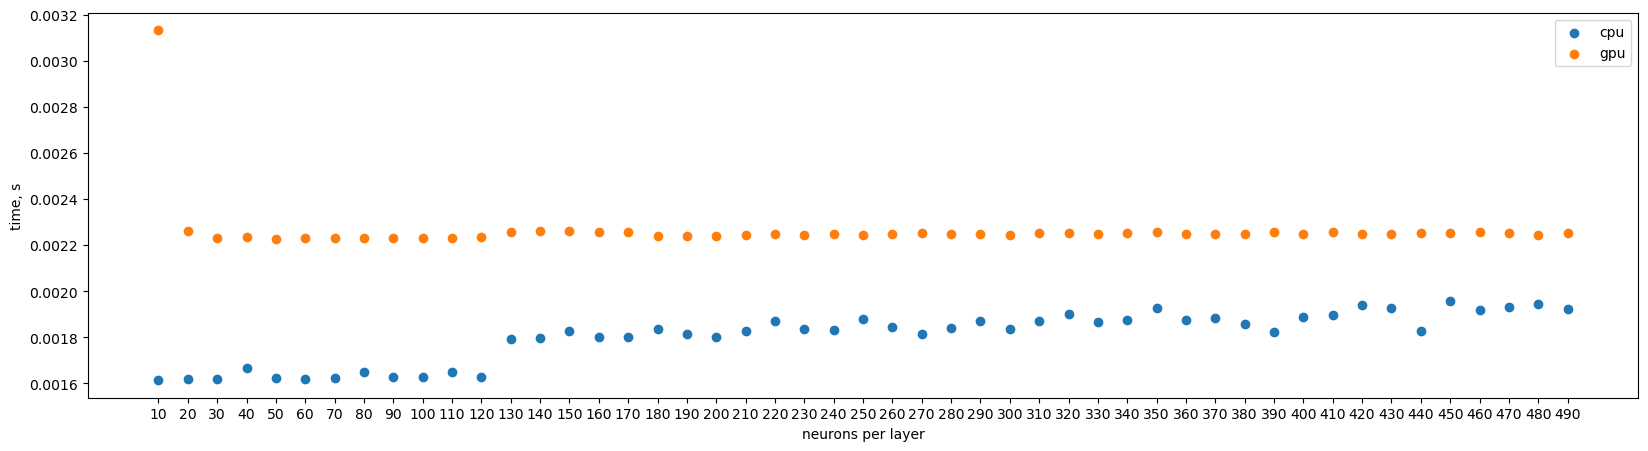

In [37]:
with open('neurons/cpu_time_dict.json') as json_file:
    cpu_time_dict = json.load(json_file)

with open('neurons/gpu_time_dict.json') as json_file:
    gpu_time_dict = json.load(json_file)

plt.figure(figsize=(20,5))
plt.scatter(np.array(list(cpu_time_dict.keys())),list(cpu_time_dict.values()), label='cpu')
plt.scatter(np.array(list(gpu_time_dict.keys())),list(gpu_time_dict.values()), label='gpu')
plt.ylabel('time, s')
plt.xlabel('neurons per layer')
plt.legend()

# time vs layers

In [8]:
n_layers = [2*p for p in range(1,13)]

for n_layer in n_layers:
    nn_input = keras.Input(shape=(1,))
    for i in range(n_layer):
        if i == 0:
            nn_dense = layers.Dense(64, activation='relu')(nn_input)
        else:
            nn_dense = layers.Dense(64, activation='relu')(nn_dense)
    
    nn_output = layers.Dense(1, activation='linear')(nn_dense)
    
    model = keras.Model(inputs=nn_input, outputs=nn_output)
    model.compile(loss='MAE', optimizer='Adam')
    
    history=model.fit(x,y,batch_size=1000, verbose=0, epochs=3)
    model.save(f'layers/{n_layer}_model.h5',save_format='h5')


2024-03-22 11:14:36.879530: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17982 MB memory:  -> device: 0, name: NVIDIA RTX A4500, pci bus id: 0000:41:00.0, compute capability: 8.6
2024-03-22 11:14:36.880109: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 18447 MB memory:  -> device: 1, name: NVIDIA RTX A4500, pci bus id: 0000:61:00.0, compute capability: 8.6
2024-03-22 11:14:37.556470: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-22 11:14:37.665326: I external/local_xla/xla/service/service.cc:168] XLA service 0x7c1266332280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-22 11:14:37.665347: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4500, Compute Capability 8.6


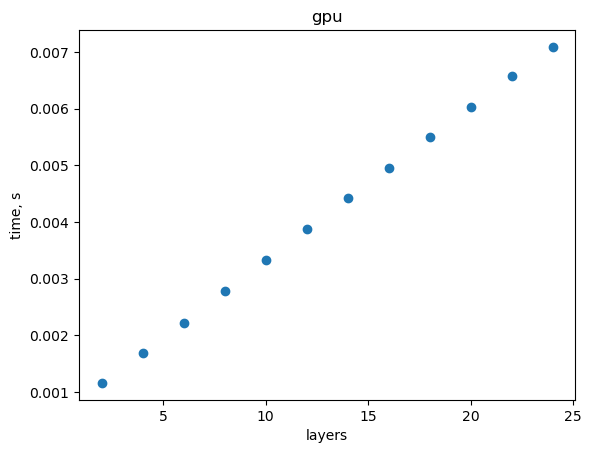

In [4]:
n_layers = [2*p for p in range(1,13)]

time_dict = {}
for n_layer in n_layers:
    tf.keras.backend.clear_session()
    model = tf.keras.models.load_model(f'layers/{n_layer}_model.h5')
    time_array = np.zeros(100)
    for i in range(100):
        tic = time.time()
        model(np.array([0.5]))
        toc = time.time()
        time_array[i] = toc-tic
    time_dict[n_layer] = time_array.mean()
    del model
    gc.collect()

plt.scatter(list(time_dict.keys()),list(time_dict.values()))
plt.ylabel('time, s')
plt.xlabel('layers')
plt.title('gpu')

with open("layers/gpu_time_dict.json", "w") as outfile: 
    json.dump(time_dict, outfile)

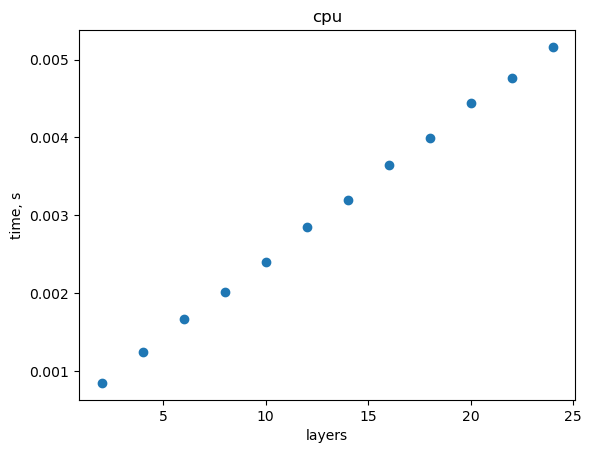

In [8]:
n_layers = [2*p for p in range(1,13)]

time_dict = {}
for n_layer in n_layers:
    tf.keras.backend.clear_session()
    model = tf.keras.models.load_model(f'layers/{n_layer}_model.h5')
    time_array = np.zeros(100)
    for i in range(100):
        tic = time.time()
        model(np.array([0.5]))
        toc = time.time()
        time_array[i] = toc-tic
    time_dict[n_layer] = time_array.mean()
    del model
    gc.collect()

plt.scatter(list(time_dict.keys()),list(time_dict.values()))
plt.ylabel('time, s')
plt.xlabel('layers')
plt.title('cpu')

with open("layers/cpu_time_dict.json", "w") as outfile: 
    json.dump(time_dict, outfile)

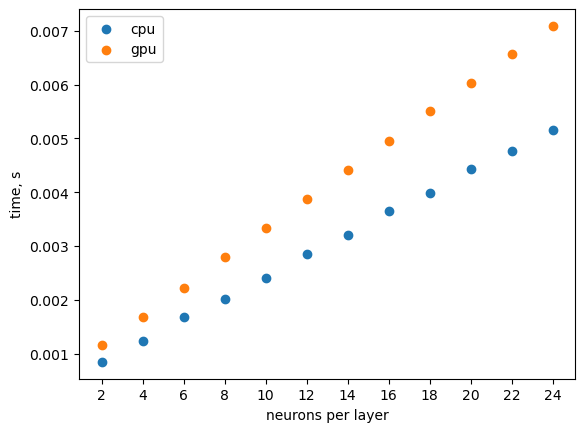

In [10]:
with open('layers/cpu_time_dict.json') as json_file:
    cpu_time_dict = json.load(json_file)

with open('layers/gpu_time_dict.json') as json_file:
    gpu_time_dict = json.load(json_file)

plt.scatter(np.array(list(cpu_time_dict.keys())),list(cpu_time_dict.values()), label='cpu')
plt.scatter(np.array(list(gpu_time_dict.keys())),list(gpu_time_dict.values()), label='gpu')
plt.ylabel('time, s')
plt.xlabel('neurons per layer')
plt.legend()

# activation functions

## relu

In [18]:
nn_input = keras.Input(shape=(1,))

nn_dense = layers.Dense(1, activation='relu')(nn_input)

nn_output = layers.Dense(1, activation='linear')(nn_dense)

model = keras.Model(inputs=nn_input, outputs=nn_output)
model.compile(loss='MAE', optimizer='Adam')

history=model.fit(x,y,batch_size=1000, verbose=0, epochs=3)
model.save(f'activation/relu_model.h5',save_format='h5')

2024-03-22 13:26:34.508720: I external/local_xla/xla/service/service.cc:168] XLA service 0x74e8b8214cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-22 13:26:34.508745: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4500, Compute Capability 8.6
2024-03-22 13:26:34.514337: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-22 13:26:34.534201: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1711113994.591755 4080724 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is consid

In [48]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model(f'activation/relu_model.h5')
time_array = np.zeros(100)
for i in range(100):
    tic = time.time()
    model(np.array([0.5]))
    toc = time.time()
    time_array[i] = toc-tic
del model
gc.collect()
print("relu network: " +str(time_array.mean())+"s")

relu network: 0.0008424162864685058s


## elu

In [20]:
nn_input = keras.Input(shape=(1,))

nn_dense = layers.Dense(1, activation='elu')(nn_input)

nn_output = layers.Dense(1, activation='linear')(nn_dense)

model = keras.Model(inputs=nn_input, outputs=nn_output)
model.compile(loss='MAE', optimizer='Adam')

history=model.fit(x,y,batch_size=1000, verbose=0, epochs=3)
model.save(f'activation/elu_model.h5',save_format='h5')

In [47]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model(f'activation/elu_model.h5')
time_array = np.zeros(100)
for i in range(100):
    tic = time.time()
    model(np.array([0.5]))
    toc = time.time()
    time_array[i] = toc-tic
del model
gc.collect()
print("elu network: " +str(time_array.mean())+"s")

elu network: 0.0008385825157165527s


## swish

In [22]:
nn_input = keras.Input(shape=(1,))

nn_dense = layers.Dense(1, activation='swish')(nn_input)

nn_output = layers.Dense(1, activation='linear')(nn_dense)

model = keras.Model(inputs=nn_input, outputs=nn_output)
model.compile(loss='MAE', optimizer='Adam')

history=model.fit(x,y,batch_size=1000, verbose=0, epochs=3)
model.save(f'activation/swish_model.h5',save_format='h5')

In [28]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model(f'activation/swish_model.h5')
time_array = np.zeros(100)
for i in range(100):
    tic = time.time()
    model(np.array([0.5]))
    toc = time.time()
    time_array[i] = toc-tic
del model
gc.collect()
print("swish network: " +str(time_array.mean())+"s")

swish network: 0.0010689020156860352s


## sigmoid

In [24]:
nn_input = keras.Input(shape=(1,))

nn_dense = layers.Dense(1, activation='swish')(nn_input)

nn_output = layers.Dense(1, activation='linear')(nn_dense)

model = keras.Model(inputs=nn_input, outputs=nn_output)
model.compile(loss='MAE', optimizer='Adam')

history=model.fit(x,y,batch_size=1000, verbose=0, epochs=3)
model.save(f'activation/sigmoid_model.h5',save_format='h5')

In [25]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model(f'activation/sigmoid_model.h5')
time_array = np.zeros(100)
for i in range(100):
    tic = time.time()
    model(np.array([0.5]))
    toc = time.time()
    time_array[i] = toc-tic
del model
gc.collect()
print("sigmoid network: " +str(time_array.mean())+"s")

sigmoid network: 0.0010616731643676757s


## gelu

In [38]:
nn_input = keras.Input(shape=(1,))

nn_dense = layers.Dense(1, activation='gelu')(nn_input)

nn_output = layers.Dense(1, activation='linear')(nn_dense)

model = keras.Model(inputs=nn_input, outputs=nn_output)
model.compile(loss='MAE', optimizer='Adam')

history=model.fit(x,y,batch_size=1000, verbose=0, epochs=3)
model.save(f'activation/gelu_model.h5',save_format='h5')

In [44]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model(f'activation/gelu_model.h5')
time_array = np.zeros(100)
for i in range(100):
    tic = time.time()
    model(np.array([0.5]))
    toc = time.time()
    time_array[i] = toc-tic
del model
gc.collect()
print("gelu network: " +str(time_array.mean())+"s")

gelu network: 0.0010531997680664062s


## test

In [10]:
nn_input = keras.Input(shape=(1,))

nn_dense = layers.Dense(64, activation='relu')(nn_input)

nn_dense = layers.Dense(64, activation='relu')(nn_dense)
nn_dense = layers.Dense(64, activation='relu')(nn_dense)
nn_dense = layers.Dense(64, activation='relu')(nn_dense)
nn_dense = layers.Dense(64, activation='relu')(nn_dense)
nn_dense = layers.Dense(64, activation='relu')(nn_dense)
nn_dense = layers.Dense(64, activation='relu')(nn_dense)
nn_dense = layers.Dense(64, activation='relu')(nn_dense)
nn_dense = layers.Dense(64, activation='relu')(nn_dense)

nn_output = layers.Dense(1, activation='linear')(nn_dense)

model = keras.Model(inputs=nn_input, outputs=nn_output)
model.compile(loss='MAE', optimizer='Adam')

history=model.fit(x,y,batch_size=1000, verbose=0, epochs=3)
model.save(f'test_model.h5',save_format='h5')

In [11]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model(f'test_model.h5')
time_array = np.zeros(100)
for i in range(100):
    tic = time.time()
    model(np.array([0.5]))
    toc = time.time()
    time_array[i] = toc-tic
del model
gc.collect()
print("test network: " +str(time_array.mean())+"s")

test network: 0.0031183409690856935s


In [12]:
model = tf.keras.models.load_model(f'test_model.h5')

In [13]:
%timeit model(np.array([0.5]))

3.07 ms ± 7.88 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
nn_input = keras.Input(shape=(1,))

nn_dense = layers.Dense(64, activation='relu')(nn_input)

nn_output = layers.Dense(1, activation='linear')(nn_dense)

model = keras.Model(inputs=nn_input, outputs=nn_output)
model.compile(loss='MAE', optimizer='Adam')

history=model.fit(x,y,batch_size=1000, verbose=0, epochs=3)
model.save(f'test_model.h5',save_format='h5')

/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model(f'test_model.h5')
time_array = np.zeros(100)
for i in range(100):
    tic = time.time()
    model(np.array([0.5]))
    toc = time.time()
    time_array[i] = toc-tic
del model
gc.collect()
print("test network: " +str(time_array.mean())+"s")

test network: 0.0006772708892822265s


In [5]:
model = tf.keras.models.load_model(f'test_model.h5')

In [6]:
%timeit model(np.array([0.5]))

635 µs ± 9.63 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
